In [35]:
import pandas as pd
# Data URL
# https://www.kaggle.com/datasets/mathchi/diabetes-data-set
df = pd.read_csv('{{your_dataset_file_path}}')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


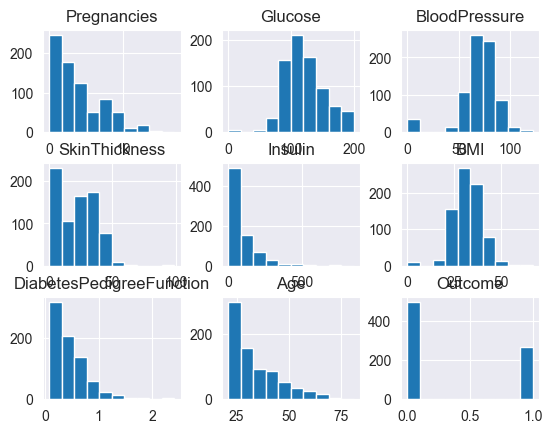

In [3]:
from matplotlib import pyplot as plt
df.hist()
plt.show()

C:\Users\Optimus Prime\AppData\Local\Temp\ipykernel_4848\1304615756.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel=False,
C:\Users\Optimus Prime\AppData\Local\Temp\ipykernel_4848\1304615756.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

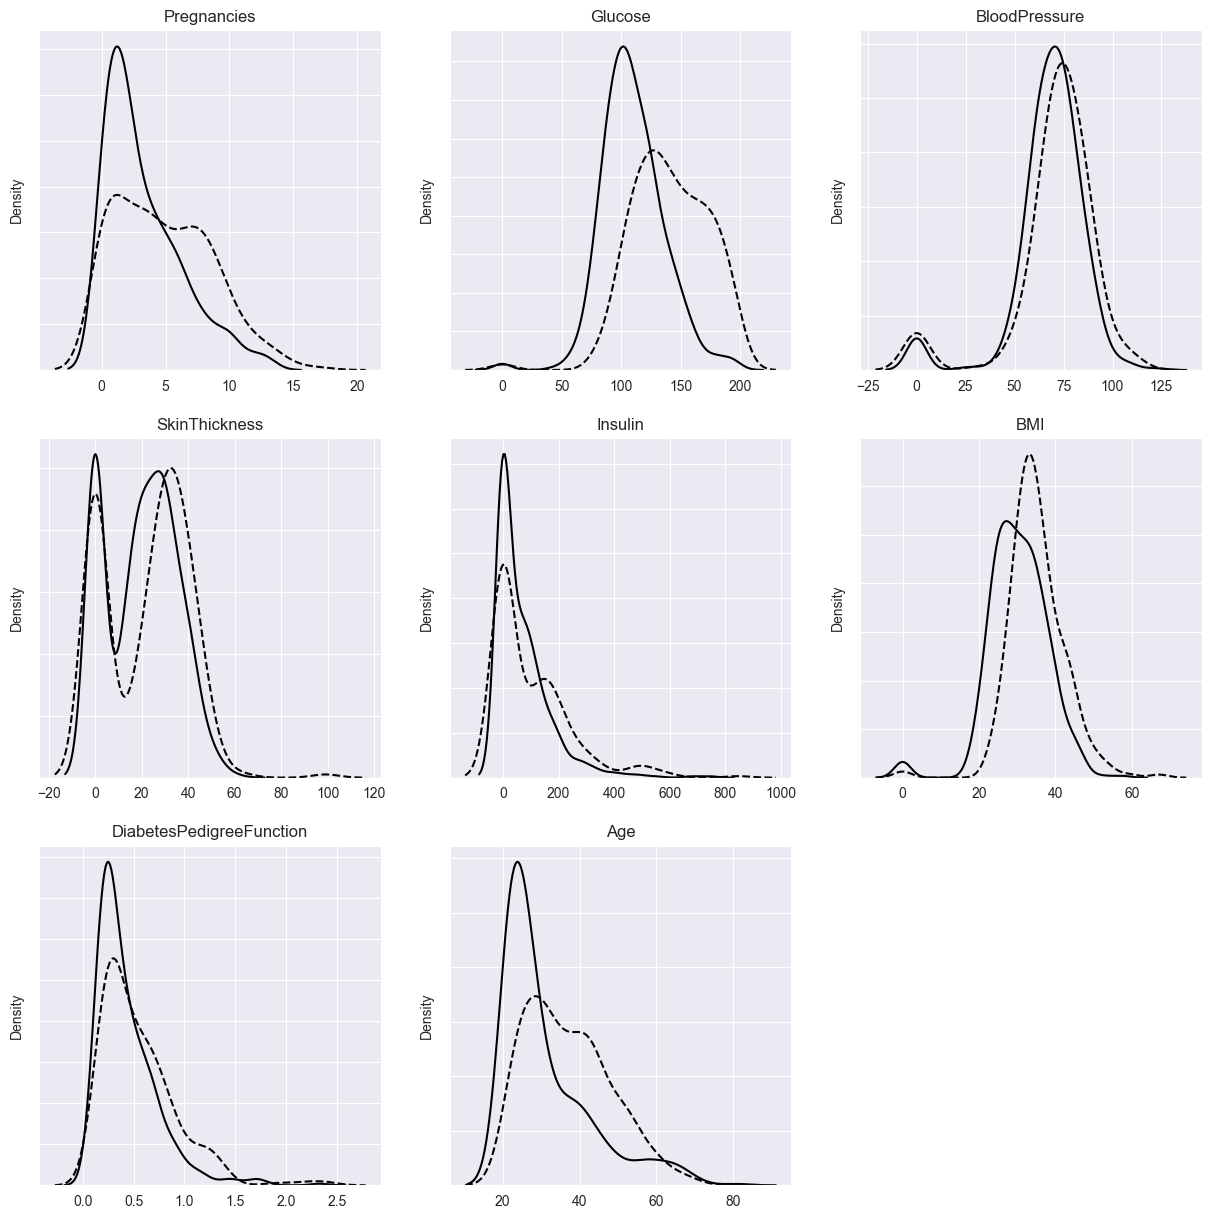

In [4]:
import seaborn as sns
plt.subplots(3,3, figsize=(15,15))

for idx, col in enumerate(df.columns) :
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel=False,
                 kde_kws={'linestyle': '-', 'color' : 'black', 'label' : "No Diebates"} )
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False,
    kde_kws={'linestyle':'--',
    'color':'black', 'label':"Diabetes"})
    ax.set_title(col)
    plt.subplot(3,3,9).set_visible(False)

plt.show()

In [5]:
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [6]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [7]:
print("Number of missing values")
for col in df.columns :
    missingValue = df.loc[df[col] == 0].shape[0]
    print(col+' : ' +str( missingValue))

Number of missing values
Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


In [8]:
import numpy as np

df['Glucose'] = df['Glucose'].replace(0,np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0,np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0,np.nan)
df['Insulin'] = df['Insulin'].replace(0,np.nan)
df['BMI'] = df['BMI'].replace(0,np.nan)

In [9]:
df['Glucose'] = df['Glucose'].fillna (df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [10]:
import pandas as pd
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)

df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

In [11]:
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [12]:
print(df.describe().loc[['mean', 'std','max'],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00            0.0           0.00     0.00  0.00   
std          1.00     1.00            1.0           1.00     1.00  1.00   
max          3.91     2.54            4.1           7.95     8.13  5.04   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


In [13]:
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'Outcome']
Y= df.loc[:, 'Outcome']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [14]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, train_size=0.2)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32,activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))

In [24]:
model.add(Dense(1, activation='sigmoid'))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5656 - loss: 0.5815
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6803 - loss: 0.5779
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7377 - loss: 0.5753
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7705 - loss: 0.5736 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7951 - loss: 0.5718
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8197 - loss: 0.5700
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8197 - loss: 0.5682 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8361 - loss: 0.5667
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8361 - loss: 0.5651
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8443 - loss: 0.5635
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8443 - loss: 0.5619
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8443 - 

In [27]:
scores = model.evaluate(x_train, y_train, )
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))

scores = model.evaluate(x_test, y_test, )
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9918 - loss: 0.3336 
Training Accuracy: 99.18%

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7403 - loss: 0.6022
Testing Accuracy: 74.03%



5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


Text(50.72222222222221, 0.5, 'Actual')

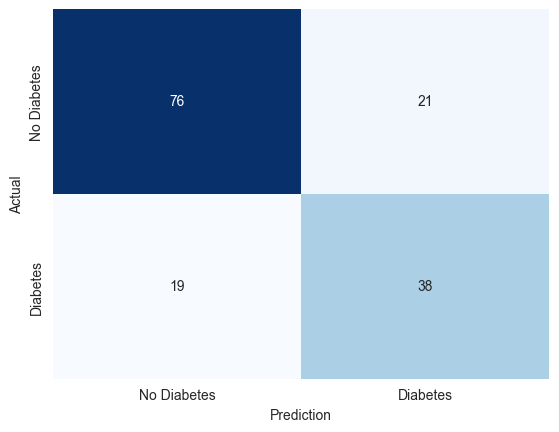

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = (model.predict(x_test) > 0.5).astype("int32")
c_matrix = confusion_matrix(y_test, y_test_pred)

ax = sns.heatmap(c_matrix, annot=True,
                 xticklabels=['No Diabetes', 'Diabetes'] ,
                yticklabels=['No Diabetes', 'Diabetes'], cbar=False, cmap='Blues')

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")


In [31]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_predict_probs = model.predict(x_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [33]:
FPR, TPR, _ = roc_curve(y_test, y_predict_probs)

Text(0, 0.5, 'True Positive Rate')

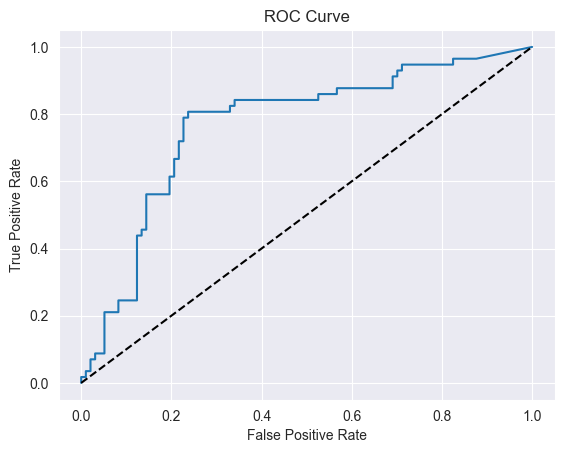

In [34]:
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')